# Image Colorization using AI

# Install Libraries

In [1]:
!pip install timm

  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached huggingface_hub-0.32.2-py3-none-any.whl.metadata (14 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached timm-1.0.15-py3-none-any.whl (2.4 MB)
Using cached huggingface_hub-0.32.2-py3-none-any.whl (509 kB)
Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl (308 kB)

   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- ---

In [2]:
!pip install modelscope
!pip install addict
!pip install datasets==2.16.0
!pip install oss2
!pip install simplejson
!pip install sortedcontainers

  Using cached modelscope-1.26.0-py3-none-any.whl.metadata (39 kB)
Using cached modelscope-1.26.0-py3-none-any.whl (5.9 MB)
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached datasets-2.16.0-py3-none-any.whl.metadata (20 kB)
  Using cached pyarrow-20.0.0-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Using cached pyarrow_hotfix-0.7-py3-none-any.whl.metadata (3.6 kB)
  Using cached dill-0.3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached xxhash-3.5.0-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.18-py310-none-any.whl.metadata (7.5 kB)
  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 k

In [11]:
import cv2
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks
import matplotlib.pyplot as plt

## Load image colorization model

In [12]:
img_colorization = pipeline(Tasks.image_colorization, model='damo/cv_ddcolor_image-colorization')

2025-06-01 20:05:03,190 - modelscope - WARNING - Model revision not specified, use revision: v1.02


2025-06-01 20:05:07,459 - modelscope - WARNING - Model revision not specified, use revision: v1.02
2025-06-01 20:05:07,896 - modelscope - INFO - initiate model from C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization
2025-06-01 20:05:07,897 - modelscope - INFO - initiate model from location C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization.
2025-06-01 20:05:07,902 - modelscope - INFO - initialize model from C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization
2025-06-01 20:05:11,995 - modelscope - INFO - Loading DDColor model from C:\Users\jgome\.cache\modelscope\hub\models\damo\cv_ddcolor_image-colorization\pytorch_model.pt, with param key: [params].
2025-06-01 20:05:12,211 - modelscope - INFO - load model done.
2025-06-01 20:05:12,220 - modelscope - WARNING - No preprocessor field found in cfg.
2025-06-01 20:05:12,221 - modelscope - WARNING - No val key and type key found in preprocessor domain of confi

## Load images

In [13]:
img1 = cv2.cvtColor(cv2.imread("../data/A/A1.jpg"), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread("../data/B/B2.jpg"), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread("../data/B/B103.jpg"), cv2.COLOR_BGR2RGB)

### Display input images

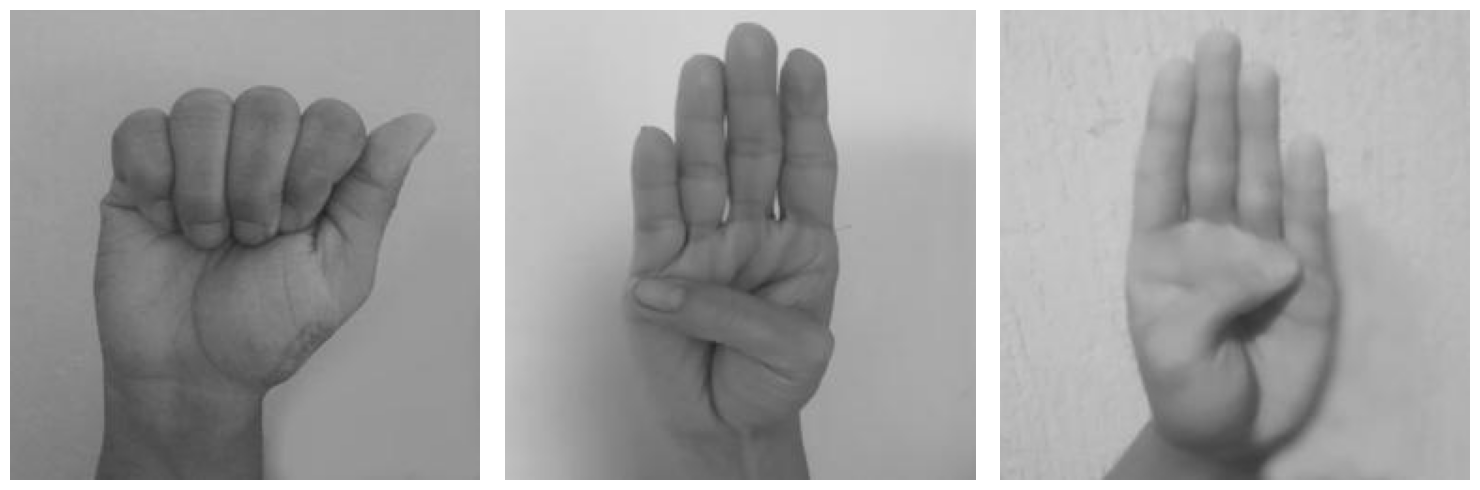

In [14]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display images in the subplots
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes

axes[1].imshow(img2)
axes[1].axis('off')

axes[2].imshow(img3)
axes[2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Colorize photos

Pass images to the image colorization pipeline.

In [15]:
result_1 = img_colorization(img1)
result_2 = img_colorization(img2)
result_3 = img_colorization(img3)

In [16]:
type(result_1[OutputKeys.OUTPUT_IMG])

numpy.ndarray

### Display colored photos

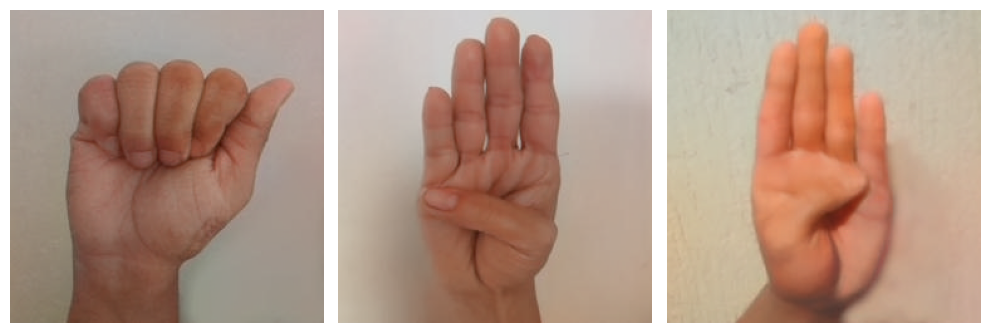

In [17]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Display images in the subplots
axes[0].imshow(cv2.cvtColor(result_1[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB))
axes[0].axis('off')  # Hide axes

axes[1].imshow(cv2.cvtColor(result_2[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB))
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(result_3[OutputKeys.OUTPUT_IMG], cv2.COLOR_BGR2RGB))
axes[2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Landmarks de la mano detectada:
Landmark 0: Original (x, y) = (0.4494, 0.4476) | Normalizado bbox (x, y) = (0.8132, 1.0000)
Landmark 1: Original (x, y) = (0.3896, 0.4346) | Normalizado bbox (x, y) = (0.4101, 0.9081)
Landmark 2: Original (x, y) = (0.3461, 0.3910) | Normalizado bbox (x, y) = (0.1172, 0.6003)
Landmark 3: Original (x, y) = (0.3336, 0.3483) | Normalizado bbox (x, y) = (0.0328, 0.2985)
Landmark 4: Original (x, y) = (0.3287, 0.3158) | Normalizado bbox (x, y) = (0.0000, 0.0685)
Landmark 5: Original (x, y) = (0.3660, 0.3475) | Normalizado bbox (x, y) = (0.2514, 0.2926)
Landmark 6: Original (x, y) = (0.3630, 0.3144) | Normalizado bbox (x, y) = (0.2312, 0.0588)
Landmark 7: Original (x, y) = (0.3743, 0.3448) | Normalizado bbox (x, y) = (0.3071, 0.2735)
Landmark 8: Original (x, y) = (0.3804, 0.3675) | Normalizado bbox (x, y) = (0.3487, 0.4339)
Landmark 9: Original (x, y) = (0.4023, 0.3410) | Normalizado bbox (x, y) = (0.4963, 0.2466)
Landmark 10: Original (x, y) = (0.4021, 0.3061) 

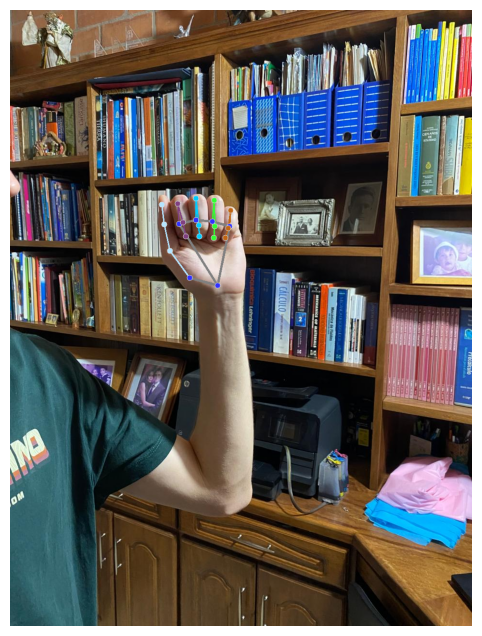

In [38]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Inicializa MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Carga la imagen en BGR
image_bgr = cv2.imread('capturas/lejos.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

data_aux = []
x_ = []
y_ = []
original_coords = []  # Para guardar las coordenadas originales

with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            x_.clear()
            y_.clear()
            original_coords.clear()
            # Extrae las coordenadas normalizadas (0-1) de MediaPipe
            for lm in hand_landmarks.landmark:
                x_.append(lm.x)
                y_.append(lm.y)
                original_coords.append((lm.x, lm.y))

            # Calcula el bounding box
            min_x = min(x_)
            min_y = min(y_)
            max_x = max(x_)
            max_y = max(y_)
            width = max_x - min_x if (max_x - min_x) != 0 else 1e-6
            height = max_y - min_y if (max_y - min_y) != 0 else 1e-6

            # Normaliza cada punto respecto al bounding box
            data_aux.clear()
            for i in range(len(x_)):
                norm_x = (x_[i] - min_x) / width
                norm_y = (y_[i] - min_y) / height
                data_aux.append(norm_x)
                data_aux.append(norm_y)

            # Dibuja los landmarks en la imagen
            mp_drawing.draw_landmarks(
                image_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )

            # Imprime las coordenadas originales y normalizadas
            print("Landmarks de la mano detectada:")
            for i in range(len(original_coords)):
                print(f"Landmark {i}: Original (x, y) = ({original_coords[i][0]:.4f}, {original_coords[i][1]:.4f}) | Normalizado bbox (x, y) = ({data_aux[2*i]:.4f}, {data_aux[2*i+1]:.4f})")

# Muestra la imagen con los landmarks
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()